In [1]:
#% pip install openpyxl
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from _utilities import prepare_data, prepare_database, plot_scatter
import sys
sys.path.append("../tools/")
import _db_tools as db

def RyR(dataframe):
    """Calculates and prints the RyR values for both fibers, including a cualitative evaluation"""
    i = 0; df_RyR = [] #Preallocate a counter and an empty dataframe where to add the rows
    std = dataframe.iloc[:, :-2].std(axis=1) #Standard deviation for each row, excluding limits
    for index, _ in enumerate(range(dataframe.shape[0])):
        i+= 1
        RyR = (6*std.iloc[index]/(dataframe.iloc[index,-1]-dataframe.iloc[index,-2]))*100 #Calculates RyR for the whole dataframe
        df_RyR.append(float(RyR)) #Adds the values of RyR to a ndarray
    df_RyR = pd.DataFrame(df_RyR) #Builds a new dataframe with the RyR values
    x_fiber = df_RyR[df_RyR.index % 2 != 0] #Indexes the fiber x RyR values in a new dataframe
    y_fiber = df_RyR[df_RyR.index % 2 == 0] #Indexes the fiber y RyR values in a new dataframe
    dfx = pd.DataFrame(x_fiber).reset_index(drop=True) #Resets row index
    dfy = pd.DataFrame(y_fiber).reset_index(drop=True) #Resets row index
    for i, _ in enumerate(range(dfx.shape[0])): #Prints the dataframe for fiber x row by row indexing with the counter
        Pass = "Correct" if dfx.iloc[i, 0] <= 10 else ("Low fail" if 10 <= dfx.iloc[i, 0] <= 25 else "High fail")
        print(f'RyR Guide fbx {dfx.index[i]+1}: ' + str(dfx.iloc[i, 0]) +' %' + ' Status: ' + Pass)
    print("")
    for i, _ in enumerate(range(dfy.shape[0])): #Prints the dataframe for fiber y row by row
        Pass = "Correct" if dfy.iloc[i, 0] <= 10 else ("Low fail" if 10 <= dfy.iloc[i, 0] <= 25 else "High fail")
        print(f'RyR Guide fby {dfy.index[i]+1}: ' + str(dfy.iloc[i, 0]) +' %' + ' Status: ' + Pass)
    return dfx, dfy

def z_score_filter(dataframe, threshold):
    """Applies a z-score to a Dataframe, filtering values that don't apply."""
    rows = []
    MEAS = dataframe.iloc[:, :-2] #Indexes the measurements
    limits = dataframe.iloc[:, -2:]  #Indexes the limits  
    for row in range(MEAS.shape[0]): #Iterates over the rows
        row = MEAS.iloc[row, :]
        z_scores = (row - row.mean()) / row.std() #Calculates the z-score
        filtered_row = np.where(abs(z_scores) <= threshold, row, np.nan) #Applies the threshold as a filter
        rows.append(filtered_row)
    filtered_df = pd.DataFrame(rows) #Builds a new dataframe
    filtered_df = pd.concat([filtered_df, limits], axis=1) #Adds again the columns
    return filtered_df

In [2]:
#Data preparation
df = prepare_data("../data/target.xlsx", filter="MEAS") #Load the output from RyR_Generator into a df
prepare_database(df, "PASSAT_B9_TOP") #Store a df inside the database of the project
dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
df = dbh.retrieve("PASSAT_B9_TOP") #Get the desired tooling data 

../database/database.db found.
Dataframe stored as *PASSAT_B9_TOP*
../database/database.db actual contents:
    measures
    table_name
    PASSAT_B9_TOP
Closed connection to: ../database/database.db
../database/database.db found.
Table PASSAT_B9_TOP retrieved succesfully.


In [3]:
#Rename and inspection
MEAS = df
MEAS

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3241,0.3249,0.3255,0.3232,0.3232,0.3232,0.3232,0.3249,0.3232,0.3262,...,0.3232,0.3252,0.3232,0.3252,0.3232,0.3243,0.3232,0.3238,0.3232,0.3273
1,0.3540,0.3539,0.3539,0.3542,0.3542,0.3542,0.3542,0.3539,0.3542,0.3537,...,0.3542,0.3539,0.3542,0.3539,0.3542,0.3540,0.3542,0.3541,0.3542,0.3535
2,0.3334,0.3334,0.3334,0.3325,0.3334,0.3334,0.3298,0.3334,0.3334,0.3334,...,0.3319,0.3334,0.3334,0.3334,0.3334,0.3334,0.3334,0.3334,0.3326,0.3334
3,0.3572,0.3572,0.3572,0.3573,0.3572,0.3572,0.3575,0.3572,0.3572,0.3572,...,0.3573,0.3572,0.3572,0.3572,0.3572,0.3572,0.3572,0.3572,0.3573,0.3572
4,0.3459,0.3459,0.3459,0.3459,0.3459,0.3459,0.3455,0.3459,0.3459,0.3459,...,0.3425,0.3459,0.3456,0.3459,0.3434,0.3459,0.3459,0.3459,0.3425,0.3459
5,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,...,0.3705,0.3707,0.3707,0.3707,0.3705,0.3707,0.3707,0.3707,0.3705,0.3707
6,0.3245,0.3245,0.3248,0.3251,0.3256,0.3245,0.3245,0.3236,0.3245,0.3257,...,0.3256,0.3245,0.3260,0.3260,0.3245,0.3245,0.3260,0.3260,0.3260,0.3222
7,0.3520,0.3520,0.3518,0.3518,0.3518,0.3520,0.3520,0.3521,0.3520,0.3525,...,0.3518,0.3520,0.3516,0.3516,0.3520,0.3520,0.3516,0.3516,0.3516,0.3516
8,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3298,...,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3351
9,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3588,...,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3584


In [4]:
#Limits extraction and inspection
limits = prepare_data("../data/target.xlsx", filter="limits")
limits

,0,1
0,0.310,0.335
1,0.325,0.358
2,0.310,0.335
3,0.325,0.358
4,0.310,0.335
5,0.325,0.358
6,0.310,0.335
7,0.325,0.358
8,0.310,0.335
9,0.325,0.358


RyR calculation

In [5]:
#Slice the dataframe to obtain only the measures and limits for each fiber
df_plus_limits = prepare_data("../data/target.xlsx") #Gets both the measure and limits
df_plus_limits = df_plus_limits.reset_index(drop=True) #Resets the rows index to start in zero again
df_plus_limits.columns = range(df_plus_limits.shape[1]) #Resets the columns index to start in zero again
#Generate a RyR for each fiber in every scale
RyRx, RyRy = RyR(df_plus_limits)

RyR Guide fbx 1: 3.5195446910555046 % Status: Correct
RyR Guide fbx 2: 1.30617345869829 % Status: Correct
RyR Guide fbx 3: 1.400240178070681 % Status: Correct
RyR Guide fbx 4: 4.353960013262799 % Status: Correct
RyR Guide fbx 5: 2.0220124246092785 % Status: Correct
RyR Guide fbx 6: 0.9225750243730017 % Status: Correct
RyR Guide fbx 7: 23.686948523406958 % Status: Low fail
RyR Guide fbx 8: 8.869830110965914 % Status: Correct
RyR Guide fbx 9: 15.457311203746709 % Status: Low fail
RyR Guide fbx 10: 15.28439122700063 % Status: Low fail
RyR Guide fbx 11: 45.55720903595615 % Status: High fail
RyR Guide fbx 12: 8.49432222262899 % Status: Correct

RyR Guide fby 1: 28.81849980541123 % Status: High fail
RyR Guide fby 2: 20.709777800636086 % Status: Low fail
RyR Guide fby 3: 30.08897151609759 % Status: High fail
RyR Guide fby 4: 23.025167639511 % Status: Low fail
RyR Guide fby 5: 22.399014756657483 % Status: Low fail
RyR Guide fby 6: 41.015737938268 % Status: High fail
RyR Guide fby 7: 40.5912713

Distribution Fitting

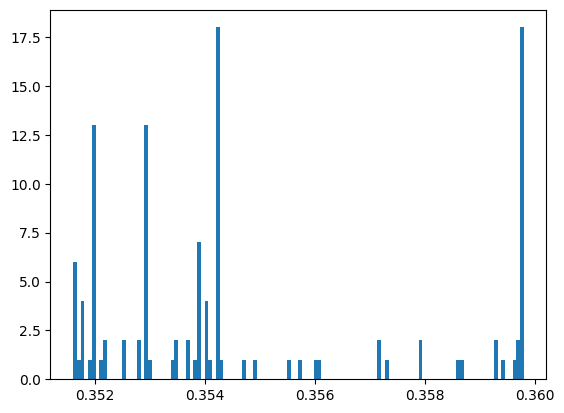

In [24]:
array = df.values #Creates a ndarray with the values of the dataframe
fbx_low = array[0::6].reshape(-1, 1) #Index and reshapes the values for every position
fby_low = array[1::6].reshape(-1, 1)
fbx_medium = array[2::6].reshape(-1, 1)
fby_medium = array[2::6].reshape(-1, 1)
fbx_high = array[4::6].reshape(-1, 1)
fby_high = array[5::6].reshape(-1, 1)
values = np.concatenate([[fbx_low], [fby_low], [fbx_medium], [fby_medium], [fbx_high], [fby_high]]).reshape(6, 120)
plt.hist(values[np.random.randint(1, 6), :], 120)
plt.show()

Filtering

![title](../media/Z-score.jpg)

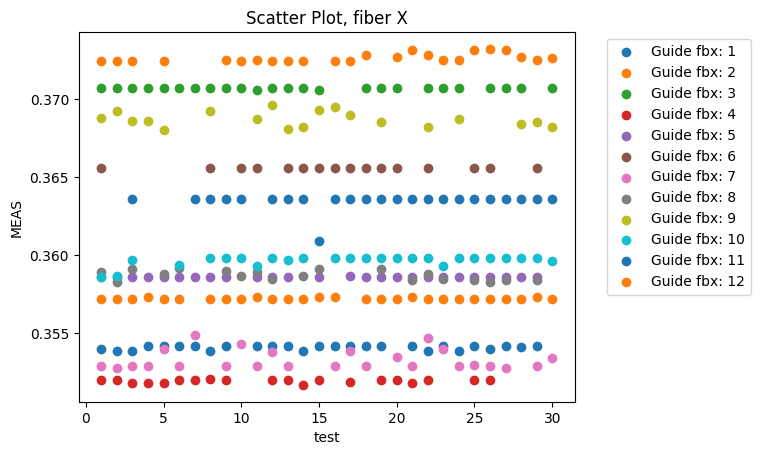

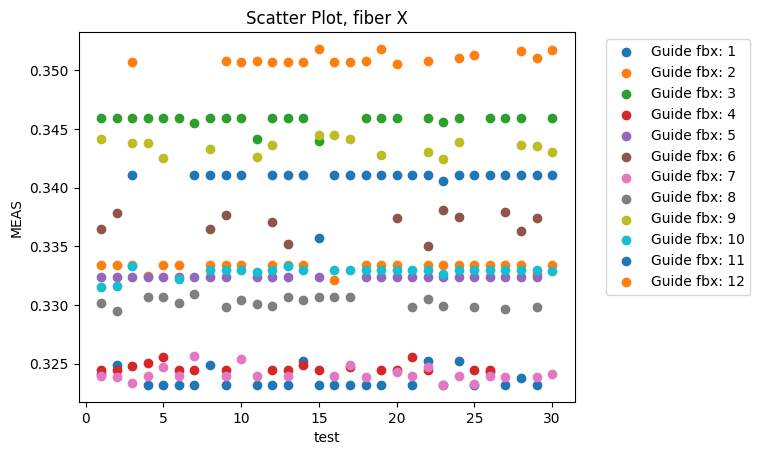

In [7]:
#Filter values by their row z-score
z_df = z_score_filter(df_plus_limits, 1)
#Plot the filtered values
plot_scatter(z_df.iloc[:, :-2], 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx: ', filter='x')
plot_scatter(z_df.iloc[:, :-2], 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx: ', filter='y')

In [8]:
#Split the dataframe for x fiber and y fiber
x_fiber = z_df[z_df.index % 2 == 0]
y_fiber = z_df[z_df.index % 2 != 0]
#Calculate the new RyR
RyRx, RyRy = RyR(z_df)

RyR Guide fbx 1: 2.3492679848232614 % Status: Correct
RyR Guide fbx 2: 0.7597371763975033 % Status: Correct
RyR Guide fbx 3: 0.5034317492677071 % Status: Correct
RyR Guide fbx 4: 1.9092048268585258 % Status: Correct
RyR Guide fbx 5: 0.35657479116049356 % Status: Correct
RyR Guide fbx 6: 1.0423940084725481e-12 % Status: Correct
RyR Guide fbx 7: 11.633995971245401 % Status: Low fail
RyR Guide fbx 8: 5.551155765861805 % Status: Correct
RyR Guide fbx 9: 8.782652573448033 % Status: Correct
RyR Guide fbx 10: 6.001059452977449 % Status: Correct
RyR Guide fbx 11: 10.02063985684021 % Status: Low fail
RyR Guide fbx 12: 4.882129642184206 % Status: Correct

RyR Guide fby 1: 18.35429775703363 % Status: Low fail
RyR Guide fby 2: 8.168231142664572 % Status: Correct
RyR Guide fby 3: 12.321298632855152 % Status: Low fail
RyR Guide fby 4: 8.67082221561111 % Status: Correct
RyR Guide fby 5: 0.0 % Status: Correct
RyR Guide fby 6: 23.93221195858756 % Status: Low fail
RyR Guide fby 7: 13.990928738168924 % S